In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
projectsWithBD = 234

This script analyse this association rules find in the fifth version

In [17]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv5.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit5_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
#df2 = df.copy()
len(df)
#df.head()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Firebird'}),frozenset({'SapHana'}),0.034783,0.030435,0.021739,0.625000,20.535714,0.020681,2.585507,1,1
1,frozenset({'SapHana'}),frozenset({'Firebird'}),0.030435,0.034783,0.021739,0.714286,20.535714,0.020681,3.378261,1,1
2,frozenset({'Firebird'}),frozenset({'Informix'}),0.034783,0.043478,0.030435,0.875000,20.125000,0.028922,7.652174,1,1
3,frozenset({'Informix'}),frozenset({'Firebird'}),0.043478,0.034783,0.030435,0.700000,20.125000,0.028922,3.217391,1,1
4,frozenset({'Neo4j'}),frozenset({'Couchbase'}),0.034783,0.034783,0.021739,0.625000,17.968750,0.020529,2.573913,1,1
...,...,...,...,...,...,...,...,...,...,...,...
331,frozenset({'Oracle'}),frozenset({'DynamoDB'}),0.256522,0.091304,0.030435,0.118644,1.299435,0.007013,1.031020,1,1
332,frozenset({'HBase'}),frozenset({'HyperSQL'}),0.069565,0.273913,0.021739,0.312500,1.140873,0.002684,1.056126,1,1
333,frozenset({'HyperSQL'}),frozenset({'HBase'}),0.273913,0.069565,0.021739,0.079365,1.140873,0.002684,1.010645,1,1
334,frozenset({'MySQL'}),frozenset({'Google Cloud Datastore'}),0.456522,0.104348,0.052174,0.114286,1.095238,0.004537,1.011220,1,1


In [18]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [19]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,0.030435,0.021739,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,0.034783,0.021739,0.714286,20.535714,0.020681,3.378261,1,1
2,Firebird,Informix,0.034783,0.043478,0.030435,0.875000,20.125000,0.028922,7.652174,1,1
3,Informix,Firebird,0.043478,0.034783,0.030435,0.700000,20.125000,0.028922,3.217391,1,1
4,Neo4j,Couchbase,0.034783,0.034783,0.021739,0.625000,17.968750,0.020529,2.573913,1,1
...,...,...,...,...,...,...,...,...,...,...,...
331,Oracle,DynamoDB,0.256522,0.091304,0.030435,0.118644,1.299435,0.007013,1.031020,1,1
332,HBase,HyperSQL,0.069565,0.273913,0.021739,0.312500,1.140873,0.002684,1.056126,1,1
333,HyperSQL,HBase,0.273913,0.069565,0.021739,0.079365,1.140873,0.002684,1.010645,1,1
334,MySQL,Google Cloud Datastore,0.456522,0.104348,0.052174,0.114286,1.095238,0.004537,1.011220,1,1


In [20]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*projectsWithBD)
df['consequent_sup_abs'] = (df['consequent support']*projectsWithBD)
df['support_abs'] = (df['support']*projectsWithBD)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,8.139130,0.030435,7.121739,0.021739,5.086957,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1,1
2,Firebird,Informix,0.034783,8.139130,0.043478,10.173913,0.030435,7.121739,0.875000,20.125000,0.028922,7.652174,1,1
3,Informix,Firebird,0.043478,10.173913,0.034783,8.139130,0.030435,7.121739,0.700000,20.125000,0.028922,3.217391,1,1
4,Neo4j,Couchbase,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Oracle,DynamoDB,0.256522,60.026087,0.091304,21.365217,0.030435,7.121739,0.118644,1.299435,0.007013,1.031020,1,1
332,HBase,HyperSQL,0.069565,16.278261,0.273913,64.095652,0.021739,5.086957,0.312500,1.140873,0.002684,1.056126,1,1
333,HyperSQL,HBase,0.273913,64.095652,0.069565,16.278261,0.021739,5.086957,0.079365,1.140873,0.002684,1.010645,1,1
334,MySQL,Google Cloud Datastore,0.456522,106.826087,0.104348,24.417391,0.052174,12.208696,0.114286,1.095238,0.004537,1.011220,1,1


In [21]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,8.139130,0.030435,7.121739,0.021739,5.086957,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1,1
2,Firebird,Informix,0.034783,8.139130,0.043478,10.173913,0.030435,7.121739,0.875000,20.125000,0.028922,7.652174,1,1
3,Informix,Firebird,0.043478,10.173913,0.034783,8.139130,0.030435,7.121739,0.700000,20.125000,0.028922,3.217391,1,1
4,Neo4j,Couchbase,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Oracle,DynamoDB,0.256522,60.026087,0.091304,21.365217,0.030435,7.121739,0.118644,1.299435,0.007013,1.031020,1,1
332,HBase,HyperSQL,0.069565,16.278261,0.273913,64.095652,0.021739,5.086957,0.312500,1.140873,0.002684,1.056126,1,1
333,HyperSQL,HBase,0.273913,64.095652,0.069565,16.278261,0.021739,5.086957,0.079365,1.140873,0.002684,1.010645,1,1
334,MySQL,Google Cloud Datastore,0.456522,106.826087,0.104348,24.417391,0.052174,12.208696,0.114286,1.095238,0.004537,1.011220,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [22]:
rules1b = df2.sort_values(['support'], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
263,MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68.165217,0.638095,1.905999,0.138469,1.838101,1,1
262,PostgreSQL,MySQL,0.334783,78.339130,0.456522,106.826087,0.291304,68.165217,0.870130,1.905999,0.138469,4.184783,1,1
315,MySQL,H2,0.456522,106.826087,0.339130,79.356522,0.234783,54.939130,0.514286,1.516484,0.079962,1.360614,1,1
314,H2,MySQL,0.339130,79.356522,0.456522,106.826087,0.234783,54.939130,0.692308,1.516484,0.079962,1.766304,1,1
274,Oracle,MySQL,0.256522,60.026087,0.456522,106.826087,0.208696,48.834783,0.813559,1.782082,0.091588,2.915020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,MS Access,SAP SQL Anywhere,0.039130,9.156522,0.073913,17.295652,0.021739,5.086957,0.555556,7.516340,0.018847,2.083696,1,1
44,SAP SQL Anywhere,MS Access,0.073913,17.295652,0.039130,9.156522,0.021739,5.086957,0.294118,7.516340,0.018847,1.361232,1,1
31,SAP SQL Anywhere,Teradata,0.073913,17.295652,0.034783,8.139130,0.021739,5.086957,0.294118,8.455882,0.019168,1.367391,1,1
30,Teradata,SAP SQL Anywhere,0.034783,8.139130,0.073913,17.295652,0.021739,5.086957,0.625000,8.455882,0.019168,2.469565,1,1


In [23]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.456522,106.826087,0.119660,28.000378,0.095274,22.294140,0.208696,1.831432,0.040647,1.146744,1.0,1.0
H2,0.339130,79.356522,0.136613,31.967506,0.086270,20.187185,0.254386,2.146244,0.039940,1.202684,1.0,1.0
PostgreSQL,0.334783,78.339130,0.124953,29.238941,0.089981,21.055577,0.268775,2.337346,0.048149,1.357361,1.0,1.0
HyperSQL,0.273913,64.095652,0.140503,32.877803,0.077346,18.098856,0.282373,2.430142,0.038860,1.263625,1.0,1.0
Oracle,0.256522,60.026087,0.136739,31.996957,0.082609,19.330435,0.322034,2.848071,0.047532,1.476174,1.0,1.0
Redis,0.182609,42.730435,0.173333,40.560000,0.062609,14.650435,0.342857,2.587729,0.030957,1.313721,1.0,1.0
MS SQL Server,0.178261,41.713043,0.140652,32.912609,0.069565,16.278261,0.390244,3.415647,0.044492,3.321104,1.0,1.0
MongoDB,0.169565,39.678261,0.174203,40.763478,0.063478,14.853913,0.374359,2.830261,0.033940,1.403696,1.0,1.0
IBM DB2,0.121739,28.486957,0.152415,35.665217,0.061353,14.356522,0.503968,4.751573,0.042798,NaN,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [24]:
rules1 = df2[(df2['consequent support'] >= 0.10)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.119660,28.000378,0.456522,106.826087,0.095274,22.294140,0.836088,1.831432,0.040647,NaN,1.0,1.0
PostgreSQL,0.124953,29.238941,0.334783,78.339130,0.089981,21.055577,0.782503,2.337346,0.048149,NaN,1.0,1.0
H2,0.136613,31.967506,0.339130,79.356522,0.086270,20.187185,0.727857,2.146244,0.039940,NaN,1.0,1.0
Oracle,0.136739,31.996957,0.256522,60.026087,0.082609,19.330435,0.730592,2.848071,0.047532,NaN,1.0,1.0
HyperSQL,0.140503,32.877803,0.273913,64.095652,0.077346,18.098856,0.665648,2.430142,0.038860,NaN,1.0,1.0
MS SQL Server,0.140652,32.912609,0.178261,41.713043,0.069565,16.278261,0.608876,3.415647,0.044492,2.965783,1.0,1.0
MongoDB,0.174203,40.763478,0.169565,39.678261,0.063478,14.853913,0.479914,2.830261,0.033940,2.336337,1.0,1.0
Redis,0.173333,40.560000,0.182609,42.730435,0.062609,14.650435,0.472542,2.587729,0.030957,2.179592,1.0,1.0
IBM DB2,0.152415,35.665217,0.121739,28.486957,0.061353,14.356522,0.578452,4.751573,0.042798,NaN,1.0,1.0


In [25]:
rules1c = df2.groupby(['antecedents','consequents']).sum().sort_values(['support'], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

,,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,consequents,,,,,,,,,,,,
MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68.165217,0.638095,1.905999,0.138469,1.838101,1,1
PostgreSQL,MySQL,0.334783,78.339130,0.456522,106.826087,0.291304,68.165217,0.870130,1.905999,0.138469,4.184783,1,1
MySQL,H2,0.456522,106.826087,0.339130,79.356522,0.234783,54.939130,0.514286,1.516484,0.079962,1.360614,1,1
H2,MySQL,0.339130,79.356522,0.456522,106.826087,0.234783,54.939130,0.692308,1.516484,0.079962,1.766304,1,1
MySQL,Oracle,0.456522,106.826087,0.256522,60.026087,0.208696,48.834783,0.457143,1.782082,0.091588,1.369565,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HBase,HyperSQL,0.069565,16.278261,0.273913,64.095652,0.021739,5.086957,0.312500,1.140873,0.002684,1.056126,1,1
SQLite,Teradata,0.095652,22.382609,0.034783,8.139130,0.021739,5.086957,0.227273,6.534091,0.018412,1.249105,1,1
SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1,1


In [26]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv5.xlsx', index=False)

In [27]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  antecedent_sup_abs  \
antecedents            consequents                                           
MySQL                  PostgreSQL             0.456522          106.826087   
                       H2                     0.456522          106.826087   
                       Oracle                 0.456522          106.826087   
PostgreSQL             Oracle                 0.334783           78.339130   
                       H2                     0.334783           78.339130   
...                                                ...                 ...   
Google Cloud Datastore HBase                  0.104348           24.417391   
SAP SQL Anywhere       MS Access              0.073913           17.295652   
Informix               SapHana                0.043478           10.173913   
HyperSQL               HBase                  0.273913           64.095652   
SQLite                 Teradata               0.095652           22.382609   

                                    consequent support  consequent_sup_abs  \
antecedents            consequents                                           
MySQL                  PostgreSQL             0.334783           78.339130   
                       H2                     0.339130           79.356522   
                       Oracle                 0.256522           60.026087   
PostgreSQL             Oracle                 0.256522           60.026087   
                       H2                     0.339130           79.356522   
...                                                ...                 ...   
Google Cloud Datastore HBase                  0.069565           16.278261   
SAP SQL Anywhere       MS Access              0.039130            9.156522   
Informix               SapHana                0.030435            7.121739   
HyperSQL               HBase                  0.069565           16.278261   
SQLite                 Teradata               0.034783            8.139130   

                                     support  support_abs  confidence  \
antecedents            consequents                                      
MySQL                  PostgreSQL   0.291304    68.165217    0.638095   
                       H2           0.234783    54.939130    0.514286   
                       Oracle       0.208696    48.834783    0.457143   
PostgreSQL             Oracle       0.208696    48.834783    0.623377   
                       H2           0.200000    46.800000    0.597403   
...                                      ...          ...         ...   
Google Cloud Datastore HBase        0.021739     5.086957    0.208333   
SAP SQL Anywhere       MS Access    0.021739     5.086957    0.294118   
Informix               SapHana      0.021739     5.086957    0.500000   
HyperSQL               HBase        0.021739     5.086957    0.079365   
SQLite                 Teradata     0.021739     5.086957    0.227273   

                                         lift  leverage  conviction  \
antecedents            consequents                                    
MySQL                  PostgreSQL    1.905999  0.138469    1.838101   
                       H2            1.516484  0.079962    1.360614   
                       Oracle        1.782082  0.091588    1.369565   
PostgreSQL             Oracle        2.430112  0.122817    1.974063   
                       H2            1.761572  0.086465    1.641515   
...                                       ...       ...         ...   
Google Cloud Datastore HBase         2.994792  0.014480    1.175286   
SAP SQL Anywhere       MS Access     7.516340  0.018847    1.361232   
Informix               SapHana      16.428571  0.020416    1.939130   
HyperSQL               HBase         1.140873  0.002684    1.010645   
SQLite                 Teradata      6.534091  0.018412    1.249105   

                                    antecedent_len  consequente_len  
antecedents            consequents                            

In [28]:
rules1c

antecedent support  antecedent_sup_abs  \
antecedents            consequents                                           
MySQL                  PostgreSQL             0.456522          106.826087   
                       H2                     0.456522          106.826087   
                       Oracle                 0.456522          106.826087   
PostgreSQL             Oracle                 0.334783           78.339130   
                       H2                     0.334783           78.339130   
...                                                ...                 ...   
Google Cloud Datastore HBase                  0.104348           24.417391   
SAP SQL Anywhere       MS Access              0.073913           17.295652   
Informix               SapHana                0.043478           10.173913   
HyperSQL               HBase                  0.273913           64.095652   
SQLite                 Teradata               0.095652           22.382609   

                                    consequent support  consequent_sup_abs  \
antecedents            consequents                                           
MySQL                  PostgreSQL             0.334783           78.339130   
                       H2                     0.339130           79.356522   
                       Oracle                 0.256522           60.026087   
PostgreSQL             Oracle                 0.256522           60.026087   
                       H2                     0.339130           79.356522   
...                                                ...                 ...   
Google Cloud Datastore HBase                  0.069565           16.278261   
SAP SQL Anywhere       MS Access              0.039130            9.156522   
Informix               SapHana                0.030435            7.121739   
HyperSQL               HBase                  0.069565           16.278261   
SQLite                 Teradata               0.034783            8.139130   

                                     support  support_abs  confidence  \
antecedents            consequents                                      
MySQL                  PostgreSQL   0.291304    68.165217    0.638095   
                       H2           0.234783    54.939130    0.514286   
                       Oracle       0.208696    48.834783    0.457143   
PostgreSQL             Oracle       0.208696    48.834783    0.623377   
                       H2           0.200000    46.800000    0.597403   
...                                      ...          ...         ...   
Google Cloud Datastore HBase        0.021739     5.086957    0.208333   
SAP SQL Anywhere       MS Access    0.021739     5.086957    0.294118   
Informix               SapHana      0.021739     5.086957    0.500000   
HyperSQL               HBase        0.021739     5.086957    0.079365   
SQLite                 Teradata     0.021739     5.086957    0.227273   

                                         lift  leverage  conviction  \
antecedents            consequents                                    
MySQL                  PostgreSQL    1.905999  0.138469    1.838101   
                       H2            1.516484  0.079962    1.360614   
                       Oracle        1.782082  0.091588    1.369565   
PostgreSQL             Oracle        2.430112  0.122817    1.974063   
                       H2            1.761572  0.086465    1.641515   
...                                       ...       ...         ...   
Google Cloud Datastore HBase         2.994792  0.014480    1.175286   
SAP SQL Anywhere       MS Access     7.516340  0.018847    1.361232   
Informix               SapHana      16.428571  0.020416    1.939130   
HyperSQL               HBase         1.140873  0.002684    1.010645   
SQLite                 Teradata      6.534091  0.018412    1.249105   

                                    antecedent_len  consequente_len  
antecedents            consequents                            

In [29]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68.165217,0.638095,1.905999,0.138469,1.838101,1,1
1,MySQL,H2,0.456522,106.826087,0.339130,79.356522,0.234783,54.939130,0.514286,1.516484,0.079962,1.360614,1,1
2,MySQL,Oracle,0.456522,106.826087,0.256522,60.026087,0.208696,48.834783,0.457143,1.782082,0.091588,1.369565,1,1
3,PostgreSQL,Oracle,0.334783,78.339130,0.256522,60.026087,0.208696,48.834783,0.623377,2.430112,0.122817,1.974063,1,1
4,PostgreSQL,H2,0.334783,78.339130,0.339130,79.356522,0.200000,46.800000,0.597403,1.761572,0.086465,1.641515,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Google Cloud Datastore,HBase,0.104348,24.417391,0.069565,16.278261,0.021739,5.086957,0.208333,2.994792,0.014480,1.175286,1,1
164,SAP SQL Anywhere,MS Access,0.073913,17.295652,0.039130,9.156522,0.021739,5.086957,0.294118,7.516340,0.018847,1.361232,1,1
165,Informix,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1
166,HyperSQL,HBase,0.273913,64.095652,0.069565,16.278261,0.021739,5.086957,0.079365,1.140873,0.002684,1.010645,1,1


This chart shows all the rules for the BDs used together in fifth version.

In [30]:
#Test showing the rules without inverted repetitions and without the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width=1000, height =1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [31]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
#order


,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68,0.638095,1.905999,0.138469,1.838101,1,1
2,MySQL,Oracle,0.456522,106.826087,0.256522,60.026087,0.208696,48,0.457143,1.782082,0.091588,1.369565,1,1
1,MySQL,H2,0.456522,106.826087,0.339130,79.356522,0.234783,54,0.514286,1.516484,0.079962,1.360614,1,1
13,MySQL,Redis,0.456522,106.826087,0.182609,42.730435,0.126087,29,0.276190,1.512472,0.042722,1.129291,1,1
15,MySQL,MongoDB,0.456522,106.826087,0.169565,39.678261,0.126087,29,0.276190,1.628816,0.048677,1.147311,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,SapHana,HyperSQL,0.030435,7.121739,0.273913,64.095652,0.026087,6,0.857143,3.129252,0.017750,5.082609,1,1
135,SapHana,MS SQL Server,0.030435,7.121739,0.178261,41.713043,0.026087,6,0.857143,4.808362,0.020662,5.752174,1,1
108,SapHana,Oracle,0.030435,7.121739,0.256522,60.026087,0.030435,7,1.000000,3.898305,0.022628,inf,1,1
137,SapHana,H2,0.030435,7.121739,0.339130,79.356522,0.026087,6,0.857143,2.527473,0.015766,4.626087,1,1


In [32]:
#if you need to generate the rules in excel
#rules_filter = orules1c.to_excel('rules_filtersv5_order.xlsx', index=False)

In [33]:
#Test sorting only by support, after the sort function
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd = orules1cd.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68,0.638095,1.905999,0.138469,1.838101,1,1
1,MySQL,H2,0.456522,106.826087,0.339130,79.356522,0.234783,54,0.514286,1.516484,0.079962,1.360614,1,1
2,MySQL,Oracle,0.456522,106.826087,0.256522,60.026087,0.208696,48,0.457143,1.782082,0.091588,1.369565,1,1
3,PostgreSQL,Oracle,0.334783,78.339130,0.256522,60.026087,0.208696,48,0.623377,2.430112,0.122817,1.974063,1,1
4,PostgreSQL,H2,0.334783,78.339130,0.339130,79.356522,0.200000,46,0.597403,1.761572,0.086465,1.641515,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,SQLite,Teradata,0.095652,22.382609,0.034783,8.139130,0.021739,5,0.227273,6.534091,0.018412,1.249105,1,1
154,DynamoDB,Couchbase,0.091304,21.365217,0.034783,8.139130,0.021739,5,0.238095,6.845238,0.018563,1.266848,1,1
165,Informix,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5,0.500000,16.428571,0.020416,1.939130,1,1
156,Couchbase,Neo4j,0.034783,8.139130,0.034783,8.139130,0.021739,5,0.625000,17.968750,0.020529,2.573913,1,1


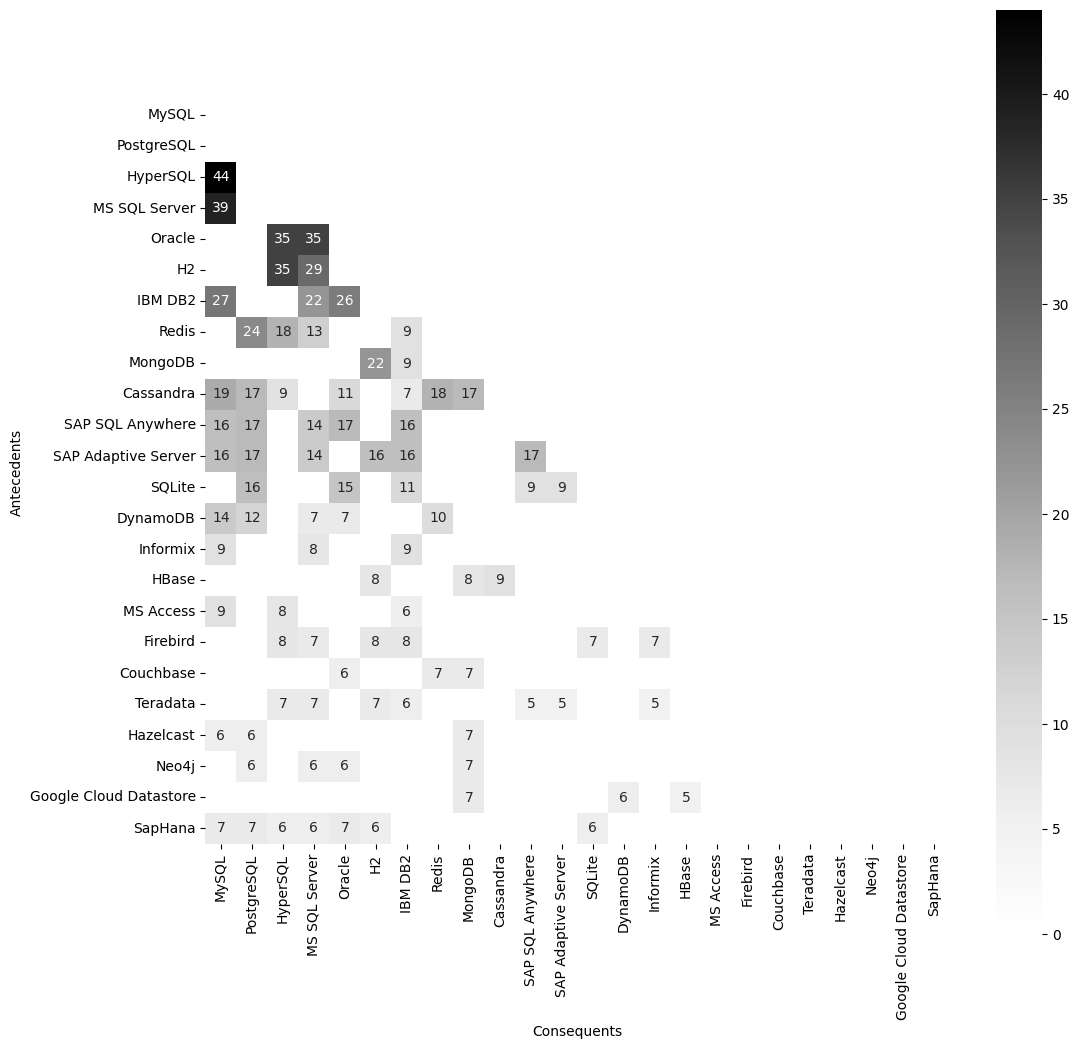

In [34]:
#Heatmap graph generated with all rules and ordering
#Suggestion for this chart would be to show all the rules without filtering by support
import seaborn as sns
pivot = orules1cd.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True),
            mask=np.triu(np.ones_like(pivot)), square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig13.pdf", format="pdf", bbox_inches="tight")

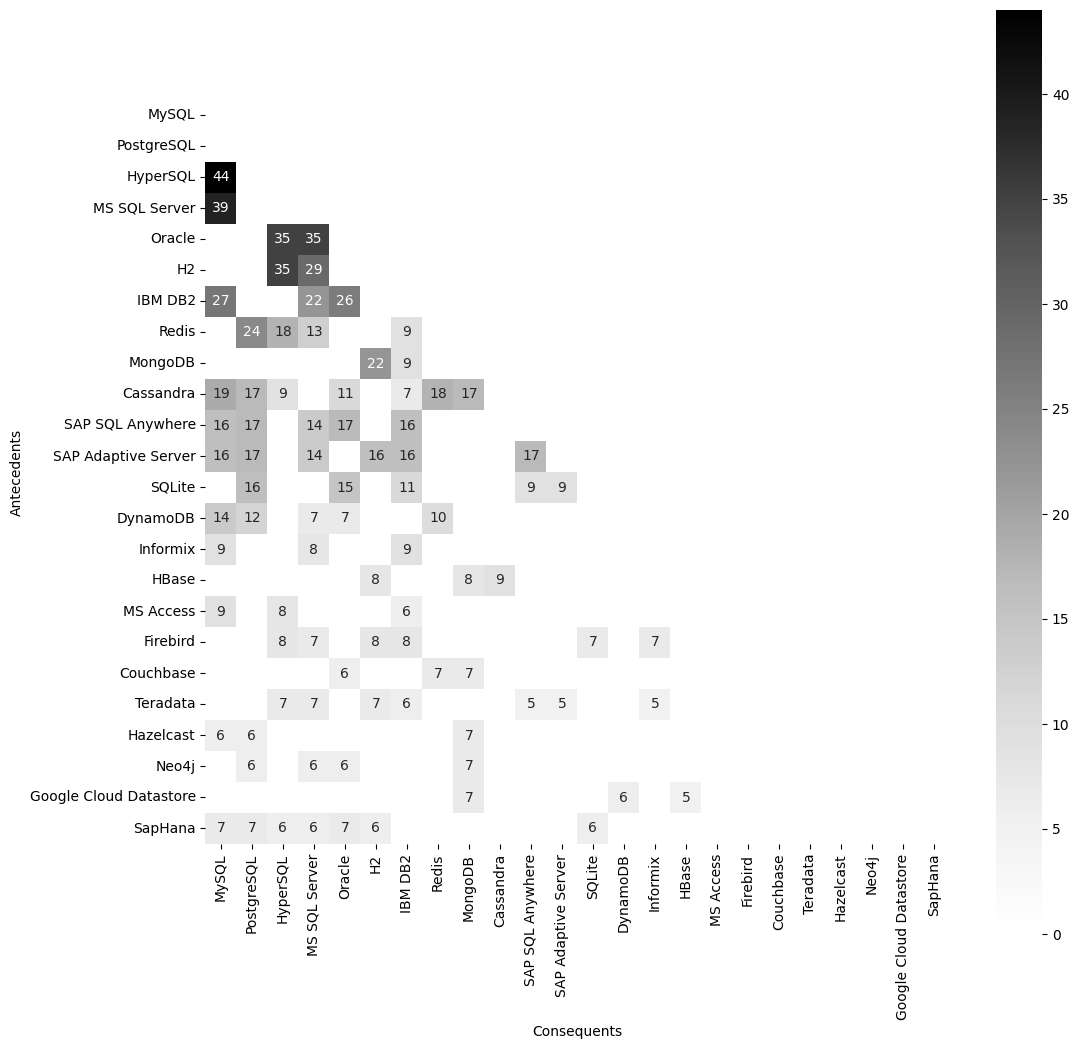

In [35]:
#Generating a heatmap without repetitions, with function ordering, following the tip:
# generate the complete heatmap with the y axis inverted and
# use the parameter mask=np.triu(np.ones_like(df)) in sns.heatmap
import seaborn as sns
pivot = orules1cd.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True),
    mask=np.triu(np.ones_like(pivot)), square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig13.pdf", format="pdf", bbox_inches="tight")

import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 

#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs','antecedent_sup_abs'], ascending=[False, False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"]) 
#fig.title('Correlation of the most frequent databases')
fig.show()


In [36]:
#Test to understand how the pivot function transforms the dataframe
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
pivot.columns
#Invertendo a posição dos BDs
pivot = pivot.iloc[::-1]
pivot = pivot.reset_index()
pivot

consequents,antecedents,MySQL,PostgreSQL,HyperSQL,MS SQL Server,Oracle,H2,IBM DB2,Redis,MongoDB,...,Informix,HBase,MS Access,Firebird,Couchbase,Teradata,Hazelcast,Neo4j,Google Cloud Datastore,SapHana
0,SapHana,7.0,7.0,6.0,6.0,7.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Google Cloud Datastore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neo4j,NaN,6.0,NaN,6.0,6.0,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hazelcast,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Teradata,NaN,NaN,7.0,7.0,NaN,7.0,6.0,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Couchbase,NaN,NaN,NaN,NaN,6.0,NaN,NaN,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
6,Firebird,NaN,NaN,8.0,7.0,NaN,8.0,8.0,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
7,MS Access,9.0,NaN,8.0,NaN,NaN,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,HBase,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Informix,9.0,NaN,NaN,8.0,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [37]:
#Test generating the graph with all the rules ordered with the function
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1cd['support_abs'] = orules1cd['support_abs'].astype(int)

fig = px.scatter(orules1cd, x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [38]:
#Test showing the rules without inverted repetitions and with dataframe ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the fifth version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width=1000, height=1000, text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [39]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support'], ascending=[False])
rules1c

,,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,consequents,,,,,,,,,,,,
MySQL,PostgreSQL,0.456522,106.826087,0.334783,78.339130,0.291304,68.165217,0.638095,1.905999,0.138469,1.838101,1.0,1.0
PostgreSQL,MySQL,0.334783,78.339130,0.456522,106.826087,0.291304,68.165217,0.870130,1.905999,0.138469,4.184783,1.0,1.0
MySQL,H2,0.456522,106.826087,0.339130,79.356522,0.234783,54.939130,0.514286,1.516484,0.079962,1.360614,1.0,1.0
H2,MySQL,0.339130,79.356522,0.456522,106.826087,0.234783,54.939130,0.692308,1.516484,0.079962,1.766304,1.0,1.0
MySQL,Oracle,0.456522,106.826087,0.256522,60.026087,0.208696,48.834783,0.457143,1.782082,0.091588,1.369565,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HBase,HyperSQL,0.069565,16.278261,0.273913,64.095652,0.021739,5.086957,0.312500,1.140873,0.002684,1.056126,1.0,1.0
SQLite,Teradata,0.095652,22.382609,0.034783,8.139130,0.021739,5.086957,0.227273,6.534091,0.018412,1.249105,1.0,1.0
SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1.0,1.0


In [40]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.119660,28.000378,0.456522,106.826087,0.095274,22.294140,0.836088,1.831432,0.040647,NaN,1.0,1.0
PostgreSQL,0.124953,29.238941,0.334783,78.339130,0.089981,21.055577,0.782503,2.337346,0.048149,NaN,1.0,1.0
H2,0.136613,31.967506,0.339130,79.356522,0.086270,20.187185,0.727857,2.146244,0.039940,NaN,1.0,1.0
Oracle,0.136739,31.996957,0.256522,60.026087,0.082609,19.330435,0.730592,2.848071,0.047532,NaN,1.0,1.0
HyperSQL,0.140503,32.877803,0.273913,64.095652,0.077346,18.098856,0.665648,2.430142,0.038860,NaN,1.0,1.0
MS SQL Server,0.140652,32.912609,0.178261,41.713043,0.069565,16.278261,0.608876,3.415647,0.044492,2.965783,1.0,1.0
MongoDB,0.174203,40.763478,0.169565,39.678261,0.063478,14.853913,0.479914,2.830261,0.033940,2.336337,1.0,1.0
Redis,0.173333,40.560000,0.182609,42.730435,0.062609,14.650435,0.472542,2.587729,0.030957,2.179592,1.0,1.0
IBM DB2,0.152415,35.665217,0.121739,28.486957,0.061353,14.356522,0.578452,4.751573,0.042798,NaN,1.0,1.0


In [41]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.456522,106.826087,0.119660,28.000378,0.095274,22.294140,0.208696,1.831432,0.040647,1.146744,1.0,1.0
PostgreSQL,0.334783,78.339130,0.124953,29.238941,0.089981,21.055577,0.268775,2.337346,0.048149,1.357361,1.0,1.0
H2,0.339130,79.356522,0.136613,31.967506,0.086270,20.187185,0.254386,2.146244,0.039940,1.202684,1.0,1.0
Oracle,0.256522,60.026087,0.136739,31.996957,0.082609,19.330435,0.322034,2.848071,0.047532,1.476174,1.0,1.0
HyperSQL,0.273913,64.095652,0.140503,32.877803,0.077346,18.098856,0.282373,2.430142,0.038860,1.263625,1.0,1.0
MS SQL Server,0.178261,41.713043,0.140652,32.912609,0.069565,16.278261,0.390244,3.415647,0.044492,3.321104,1.0,1.0
MongoDB,0.169565,39.678261,0.174203,40.763478,0.063478,14.853913,0.374359,2.830261,0.033940,1.403696,1.0,1.0
Redis,0.182609,42.730435,0.173333,40.560000,0.062609,14.650435,0.342857,2.587729,0.030957,1.313721,1.0,1.0
IBM DB2,0.121739,28.486957,0.152415,35.665217,0.061353,14.356522,0.503968,4.751573,0.042798,NaN,1.0,1.0


In [42]:
rules1cb = rules1ca[(rules1ca['support'] >= 0.043)]  
rules1cb

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.456522,106.826087,0.119660,28.000378,0.095274,22.294140,0.208696,1.831432,0.040647,1.146744,1.0,1.0
PostgreSQL,0.334783,78.339130,0.124953,29.238941,0.089981,21.055577,0.268775,2.337346,0.048149,1.357361,1.0,1.0
H2,0.339130,79.356522,0.136613,31.967506,0.086270,20.187185,0.254386,2.146244,0.039940,1.202684,1.0,1.0
Oracle,0.256522,60.026087,0.136739,31.996957,0.082609,19.330435,0.322034,2.848071,0.047532,1.476174,1.0,1.0
HyperSQL,0.273913,64.095652,0.140503,32.877803,0.077346,18.098856,0.282373,2.430142,0.038860,1.263625,1.0,1.0
MS SQL Server,0.178261,41.713043,0.140652,32.912609,0.069565,16.278261,0.390244,3.415647,0.044492,3.321104,1.0,1.0
MongoDB,0.169565,39.678261,0.174203,40.763478,0.063478,14.853913,0.374359,2.830261,0.033940,1.403696,1.0,1.0
Redis,0.182609,42.730435,0.173333,40.560000,0.062609,14.650435,0.342857,2.587729,0.030957,1.313721,1.0,1.0
IBM DB2,0.121739,28.486957,0.152415,35.665217,0.061353,14.356522,0.503968,4.751573,0.042798,NaN,1.0,1.0


In [43]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
228,Teradata,MySQL,0.034783,8.139130,0.456522,106.826087,0.034783,8.139130,1.000000,2.190476,0.018904,inf,1,1
229,Couchbase,MySQL,0.034783,8.139130,0.456522,106.826087,0.034783,8.139130,1.000000,2.190476,0.018904,inf,1,1
231,SapHana,MySQL,0.030435,7.121739,0.456522,106.826087,0.030435,7.121739,1.000000,2.190476,0.016541,inf,1,1
233,MS Access,MySQL,0.039130,9.156522,0.456522,106.826087,0.039130,9.156522,1.000000,2.190476,0.021267,inf,1,1
234,Firebird,MySQL,0.034783,8.139130,0.456522,106.826087,0.034783,8.139130,1.000000,2.190476,0.018904,inf,1,1
241,IBM DB2,MySQL,0.121739,28.486957,0.456522,106.826087,0.117391,27.469565,0.964286,2.112245,0.061815,15.217391,1,1
244,MS SQL Server,MySQL,0.178261,41.713043,0.456522,106.826087,0.169565,39.678261,0.951220,2.083624,0.088185,11.141304,1,1
246,SAP SQL Anywhere,MySQL,0.073913,17.295652,0.456522,106.826087,0.069565,16.278261,0.941176,2.061625,0.035822,9.239130,1,1
247,SAP Adaptive Server,MySQL,0.073913,17.295652,0.456522,106.826087,0.069565,16.278261,0.941176,2.061625,0.035822,9.239130,1,1
254,Cassandra,MySQL,0.091304,21.365217,0.456522,106.826087,0.082609,19.330435,0.904762,1.981859,0.040926,5.706522,1,1


In [44]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL') | (df['antecedents'].str.contains('PostgreSQL'))) & (df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
150,SAP SQL Anywhere,PostgreSQL,0.073913,17.295652,0.334783,78.339130,0.073913,17.295652,1.000000,2.987013,0.049168,inf,1,1
153,SapHana,PostgreSQL,0.030435,7.121739,0.334783,78.339130,0.030435,7.121739,1.000000,2.987013,0.020246,inf,1,1
155,Firebird,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.034783,8.139130,1.000000,2.987013,0.023138,inf,1,1
157,SAP Adaptive Server,PostgreSQL,0.073913,17.295652,0.334783,78.339130,0.073913,17.295652,1.000000,2.987013,0.049168,inf,1,1
159,Teradata,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.034783,8.139130,1.000000,2.987013,0.023138,inf,1,1
160,IBM DB2,PostgreSQL,0.121739,28.486957,0.334783,78.339130,0.121739,28.486957,1.000000,2.987013,0.080983,inf,1,1
174,MS SQL Server,PostgreSQL,0.178261,41.713043,0.334783,78.339130,0.173913,40.695652,0.975610,2.914159,0.114234,27.273913,1,1
191,Informix,PostgreSQL,0.043478,10.173913,0.334783,78.339130,0.039130,9.156522,0.900000,2.688312,0.024575,6.652174,1,1
196,MS Access,PostgreSQL,0.039130,9.156522,0.334783,78.339130,0.034783,8.139130,0.888889,2.655123,0.021682,5.986957,1,1
201,Couchbase,PostgreSQL,0.034783,8.139130,0.334783,78.339130,0.030435,7.121739,0.875000,2.613636,0.018790,5.321739,1,1


In [45]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
162,Informix,H2,0.043478,10.173913,0.33913,79.356522,0.043478,10.173913,1.000000,2.948718,0.028733,inf,1,1
164,Firebird,H2,0.034783,8.139130,0.33913,79.356522,0.034783,8.139130,1.000000,2.948718,0.022987,inf,1,1
182,SAP SQL Anywhere,H2,0.073913,17.295652,0.33913,79.356522,0.069565,16.278261,0.941176,2.775264,0.044499,11.234783,1,1
183,SAP Adaptive Server,H2,0.073913,17.295652,0.33913,79.356522,0.069565,16.278261,0.941176,2.775264,0.044499,11.234783,1,1
199,MS Access,H2,0.039130,9.156522,0.33913,79.356522,0.034783,8.139130,0.888889,2.621083,0.021512,5.947826,1,1
206,Teradata,H2,0.034783,8.139130,0.33913,79.356522,0.030435,7.121739,0.875000,2.580128,0.018639,5.286957,1,1
209,SapHana,H2,0.030435,7.121739,0.33913,79.356522,0.026087,6.104348,0.857143,2.527473,0.015766,4.626087,1,1
222,IBM DB2,H2,0.121739,28.486957,0.33913,79.356522,0.091304,21.365217,0.750000,2.211538,0.050019,2.643478,1,1
223,Neo4j,H2,0.034783,8.139130,0.33913,79.356522,0.026087,6.104348,0.750000,2.211538,0.014291,2.643478,1,1
243,MS SQL Server,H2,0.178261,41.713043,0.33913,79.356522,0.126087,29.504348,0.707317,2.085679,0.065633,2.257971,1,1


In [46]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
111,SapHana,Oracle,0.030435,7.121739,0.256522,60.026087,0.030435,7.121739,1.000000,3.898305,0.022628,inf,1,1
112,SAP Adaptive Server,Oracle,0.073913,17.295652,0.256522,60.026087,0.073913,17.295652,1.000000,3.898305,0.054953,inf,1,1
114,MS Access,Oracle,0.039130,9.156522,0.256522,60.026087,0.039130,9.156522,1.000000,3.898305,0.029093,inf,1,1
115,Firebird,Oracle,0.034783,8.139130,0.256522,60.026087,0.034783,8.139130,1.000000,3.898305,0.025860,inf,1,1
118,Teradata,Oracle,0.034783,8.139130,0.256522,60.026087,0.034783,8.139130,1.000000,3.898305,0.025860,inf,1,1
119,SAP SQL Anywhere,Oracle,0.073913,17.295652,0.256522,60.026087,0.073913,17.295652,1.000000,3.898305,0.054953,inf,1,1
129,IBM DB2,Oracle,0.121739,28.486957,0.256522,60.026087,0.113043,26.452174,0.928571,3.619855,0.081815,10.408696,1,1
131,Informix,Oracle,0.043478,10.173913,0.256522,60.026087,0.039130,9.156522,0.900000,3.508475,0.027977,7.434783,1,1
132,MS SQL Server,Oracle,0.178261,41.713043,0.256522,60.026087,0.152174,35.608696,0.853659,3.327821,0.106446,5.080435,1,1
169,Neo4j,Oracle,0.034783,8.139130,0.256522,60.026087,0.026087,6.104348,0.750000,2.923729,0.017164,2.973913,1,1


In [47]:
#rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules6

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
80,Firebird,MS SQL Server,0.034783,8.139130,0.178261,41.713043,0.030435,7.121739,0.875000,4.908537,0.024234,6.573913,1,1
81,Teradata,MS SQL Server,0.034783,8.139130,0.178261,41.713043,0.030435,7.121739,0.875000,4.908537,0.024234,6.573913,1,1
83,SapHana,MS SQL Server,0.030435,7.121739,0.178261,41.713043,0.026087,6.104348,0.857143,4.808362,0.020662,5.752174,1,1
94,SAP Adaptive Server,MS SQL Server,0.073913,17.295652,0.178261,41.713043,0.060870,14.243478,0.823529,4.619799,0.047694,4.656522,1,1
95,SAP SQL Anywhere,MS SQL Server,0.073913,17.295652,0.178261,41.713043,0.060870,14.243478,0.823529,4.619799,0.047694,4.656522,1,1
96,Informix,MS SQL Server,0.043478,10.173913,0.178261,41.713043,0.034783,8.139130,0.800000,4.487805,0.027032,4.108696,1,1
98,IBM DB2,MS SQL Server,0.121739,28.486957,0.178261,41.713043,0.095652,22.382609,0.785714,4.407666,0.073951,3.834783,1,1
101,Couchbase,MS SQL Server,0.034783,8.139130,0.178261,41.713043,0.026087,6.104348,0.750000,4.207317,0.019887,3.286957,1,1
103,Neo4j,MS SQL Server,0.034783,8.139130,0.178261,41.713043,0.026087,6.104348,0.750000,4.207317,0.019887,3.286957,1,1


In [48]:
rules7 =df[ (df['consequents'] .str.contains('MariaDB'))  & (df['confidence'] > 0.4) ]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [49]:
rules8 = df[ (df['consequents'].str.contains('Redis')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
87,Couchbase,Redis,0.034783,8.139130,0.182609,42.730435,0.030435,7.121739,0.875000,4.791667,0.024083,6.539130,1,1
90,Cassandra,Redis,0.091304,21.365217,0.182609,42.730435,0.078261,18.313043,0.857143,4.693878,0.061588,5.721739,1,1
106,Neo4j,Redis,0.034783,8.139130,0.182609,42.730435,0.026087,6.104348,0.750000,4.107143,0.019735,3.269565,1,1
123,Hazelcast,Redis,0.043478,10.173913,0.182609,42.730435,0.030435,7.121739,0.700000,3.833333,0.022495,2.724638,1,1


In [50]:
#rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [51]:
#rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10 = df[ (df['consequents'].str.contains('IBM DB2')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
35,Firebird,IBM DB2,0.034783,8.139130,0.121739,28.486957,0.034783,8.139130,1.000000,8.214286,0.030548,inf,1,1
37,SapHana,IBM DB2,0.030435,7.121739,0.121739,28.486957,0.030435,7.121739,1.000000,8.214286,0.026730,inf,1,1
41,SAP Adaptive Server,IBM DB2,0.073913,17.295652,0.121739,28.486957,0.069565,16.278261,0.941176,7.731092,0.060567,14.930435,1,1
42,SAP SQL Anywhere,IBM DB2,0.073913,17.295652,0.121739,28.486957,0.069565,16.278261,0.941176,7.731092,0.060567,14.930435,1,1
49,Informix,IBM DB2,0.043478,10.173913,0.121739,28.486957,0.039130,9.156522,0.900000,7.392857,0.033837,8.782609,1,1
60,Teradata,IBM DB2,0.034783,8.139130,0.121739,28.486957,0.026087,6.104348,0.750000,6.160714,0.021853,3.513043,1,1
62,Neo4j,IBM DB2,0.034783,8.139130,0.121739,28.486957,0.026087,6.104348,0.750000,6.160714,0.021853,3.513043,1,1


In [52]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB')) & (df['confidence'] > 0.7) ]
rules11 = df[ (df['consequents'] .str.contains('MongoDB')) & (df['confidence'] > 0.5) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
74,Couchbase,MongoDB,0.034783,8.139130,0.169565,39.678261,0.030435,7.121739,0.875000,5.160256,0.024537,6.643478,1,1
75,Neo4j,MongoDB,0.034783,8.139130,0.169565,39.678261,0.030435,7.121739,0.875000,5.160256,0.024537,6.643478,1,1
89,Cassandra,MongoDB,0.091304,21.365217,0.169565,39.678261,0.073913,17.295652,0.809524,4.774115,0.058431,4.359783,1,1
104,Hazelcast,MongoDB,0.043478,10.173913,0.169565,39.678261,0.030435,7.121739,0.700000,4.128205,0.023062,2.768116,1,1
136,Redis,MongoDB,0.182609,42.730435,0.169565,39.678261,0.100000,23.400000,0.547619,3.229548,0.069036,1.835698,1,1


In [53]:
rules12 = df[ (df['consequents'] .str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
24,Firebird,SQLite,0.034783,8.139130,0.095652,22.382609,0.030435,7.121739,0.875000,9.147727,0.027108,7.234783,1,1
26,SapHana,SQLite,0.030435,7.121739,0.095652,22.382609,0.026087,6.104348,0.857143,8.961039,0.023176,6.330435,1,1
51,Informix,SQLite,0.043478,10.173913,0.095652,22.382609,0.030435,7.121739,0.700000,7.318182,0.026276,3.014493,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [54]:
rules7a = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules7a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [55]:
rules3a = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
#rules3a = df2[(df2['consequents'].str.contains('PostGIS'))]
rules3a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [56]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [57]:
rules12 = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [58]:
rules13 = df2[(df2['lift'] > 10)] #>20
rules13

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,8.139130,0.030435,7.121739,0.021739,5.086957,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1,1
2,Firebird,Informix,0.034783,8.139130,0.043478,10.173913,0.030435,7.121739,0.875000,20.125000,0.028922,7.652174,1,1
3,Informix,Firebird,0.043478,10.173913,0.034783,8.139130,0.030435,7.121739,0.700000,20.125000,0.028922,3.217391,1,1
4,Neo4j,Couchbase,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
5,Couchbase,Neo4j,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
6,Informix,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1
7,SapHana,Informix,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
8,Informix,Teradata,0.043478,10.173913,0.034783,8.139130,0.021739,5.086957,0.500000,14.375000,0.020227,1.930435,1,1
9,Teradata,Informix,0.034783,8.139130,0.043478,10.173913,0.021739,5.086957,0.625000,14.375000,0.020227,2.550725,1,1


rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

In [59]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
10,SAP SQL Anywhere,SAP Adaptive Server,0.073913,17.295652,0.073913,17.295652,0.073913,17.295652,1.000000,13.529412,0.068450,inf,1,1
11,SAP Adaptive Server,SAP SQL Anywhere,0.073913,17.295652,0.073913,17.295652,0.073913,17.295652,1.000000,13.529412,0.068450,inf,1,1
35,Firebird,IBM DB2,0.034783,8.139130,0.121739,28.486957,0.034783,8.139130,1.000000,8.214286,0.030548,inf,1,1
37,SapHana,IBM DB2,0.030435,7.121739,0.121739,28.486957,0.030435,7.121739,1.000000,8.214286,0.026730,inf,1,1
41,SAP Adaptive Server,IBM DB2,0.073913,17.295652,0.121739,28.486957,0.069565,16.278261,0.941176,7.731092,0.060567,14.930435,1,1
42,SAP SQL Anywhere,IBM DB2,0.073913,17.295652,0.121739,28.486957,0.069565,16.278261,0.941176,7.731092,0.060567,14.930435,1,1
49,Informix,IBM DB2,0.043478,10.173913,0.121739,28.486957,0.039130,9.156522,0.900000,7.392857,0.033837,8.782609,1,1
115,Firebird,Oracle,0.034783,8.139130,0.256522,60.026087,0.034783,8.139130,1.000000,3.898305,0.025860,inf,1,1
119,SAP SQL Anywhere,Oracle,0.073913,17.295652,0.256522,60.026087,0.073913,17.295652,1.000000,3.898305,0.054953,inf,1,1
118,Teradata,Oracle,0.034783,8.139130,0.256522,60.026087,0.034783,8.139130,1.000000,3.898305,0.025860,inf,1,1


In [60]:
rules14 = df2[(df2['lift'] > 8.9)] #>20(['support_abs'], ascending=[False])
#rules14 = rules14.sort_values(['lift'], ascending=['False'])
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,SapHana,0.034783,8.139130,0.030435,7.121739,0.021739,5.086957,0.625000,20.535714,0.020681,2.585507,1,1
1,SapHana,Firebird,0.030435,7.121739,0.034783,8.139130,0.021739,5.086957,0.714286,20.535714,0.020681,3.378261,1,1
2,Firebird,Informix,0.034783,8.139130,0.043478,10.173913,0.030435,7.121739,0.875000,20.125000,0.028922,7.652174,1,1
3,Informix,Firebird,0.043478,10.173913,0.034783,8.139130,0.030435,7.121739,0.700000,20.125000,0.028922,3.217391,1,1
4,Neo4j,Couchbase,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
5,Couchbase,Neo4j,0.034783,8.139130,0.034783,8.139130,0.021739,5.086957,0.625000,17.968750,0.020529,2.573913,1,1
6,Informix,SapHana,0.043478,10.173913,0.030435,7.121739,0.021739,5.086957,0.500000,16.428571,0.020416,1.939130,1,1
7,SapHana,Informix,0.030435,7.121739,0.043478,10.173913,0.021739,5.086957,0.714286,16.428571,0.020416,3.347826,1,1
8,Informix,Teradata,0.043478,10.173913,0.034783,8.139130,0.021739,5.086957,0.500000,14.375000,0.020227,1.930435,1,1
9,Teradata,Informix,0.034783,8.139130,0.043478,10.173913,0.021739,5.086957,0.625000,14.375000,0.020227,2.550725,1,1


In [61]:
#rules14_filter = rules14.to_excel('rules_filters_liftv5.xlsx', index=False)

In [62]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)